In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/games-analysis/video_games.csv
/kaggle/input/games-analysis/games.csv
/kaggle/input/games-analysis/vgsales.csv


In [2]:
# Importing necessary libraries
import pandas as pd

# Loading the three datasets
games_df = pd.read_csv('/kaggle/input/games-analysis/games.csv')
vgsales_df = pd.read_csv('//kaggle/input/games-analysis/vgsales.csv')
video_games_df = pd.read_csv('/kaggle/input/games-analysis/video_games.csv')

# Checking the first few rows and columns for each dataset
games_df.head()


,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [3]:
games_df.columns.tolist()

['Unnamed: 0',
 'Title',
 'Release Date',
 'Team',
 'Rating',
 'Times Listed',
 'Number of Reviews',
 'Genres',
 'Summary',
 'Reviews',
 'Plays',
 'Playing',
 'Backlogs',
 'Wishlist']

In [4]:
vgsales_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
vgsales_df.columns.tolist()

['Rank',
 'Name',
 'Platform',
 'Year',
 'Genre',
 'Publisher',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales']

In [6]:
video_games_df.head()

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,...,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,...,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,81,...,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,...,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333


In [7]:
video_games_df.columns.tolist()

['Title',
 'Features.Handheld?',
 'Features.Max Players',
 'Features.Multiplatform?',
 'Features.Online?',
 'Metadata.Genres',
 'Metadata.Licensed?',
 'Metadata.Publishers',
 'Metadata.Sequel?',
 'Metrics.Review Score',
 'Metrics.Sales',
 'Metrics.Used Price',
 'Release.Console',
 'Release.Rating',
 'Release.Re-release?',
 'Release.Year',
 'Length.All PlayStyles.Average',
 'Length.All PlayStyles.Leisure',
 'Length.All PlayStyles.Median',
 'Length.All PlayStyles.Polled',
 'Length.All PlayStyles.Rushed',
 'Length.Completionists.Average',
 'Length.Completionists.Leisure',
 'Length.Completionists.Median',
 'Length.Completionists.Polled',
 'Length.Completionists.Rushed',
 'Length.Main + Extras.Average',
 'Length.Main + Extras.Leisure',
 'Length.Main + Extras.Median',
 'Length.Main + Extras.Polled',
 'Length.Main + Extras.Rushed',
 'Length.Main Story.Average',
 'Length.Main Story.Leisure',
 'Length.Main Story.Median',
 'Length.Main Story.Polled',
 'Length.Main Story.Rushed']

In [8]:
# Step 1: Basic Cleaning

# Drop unnecessary columns
games_df_cleaned = games_df.drop(columns=['Unnamed: 0'])
# Rename for consistency
games_df_cleaned = games_df_cleaned.rename(columns={'Title': 'Game', 'Release Date': 'Release_Date'})

vgsales_df_cleaned = vgsales_df.rename(columns={'Name': 'Game'})
video_games_df_cleaned = video_games_df.rename(columns={'Title': 'Game'})

# Step 2: Merge datasets based on the 'Game' title
# We'll do left joins to retain as much information as possible
merged_df = pd.merge(games_df_cleaned, vgsales_df_cleaned, on='Game', how='left')
merged_df = pd.merge(merged_df, video_games_df_cleaned, on='Game', how='left')

# Step 3: Feature Engineering
# Example: Create a "Popularity Score" by combining Plays, Wishlist, and Rating if they exist
def popularity_score(row):
    try:
        plays = int(str(row['Plays']).replace('K', '000').replace('.', ''))
    except:
        plays = 0
    try:
        wishlist = int(str(row['Wishlist']).replace('K', '000').replace('.', ''))
    except:
        wishlist = 0
    try:
        rating = float(row['Rating'])
    except:
        rating = 0
    return plays * 0.5 + wishlist * 0.3 + rating * 100  # Weighted

merged_df['Popularity_Score'] = merged_df.apply(popularity_score, axis=1)

# Example: Categorize Global Sales
def sales_category(sales):
    if pd.isna(sales):
        return "Unknown"
    elif sales >= 10:
        return "Blockbuster"
    elif sales >= 1:
        return "Hit"
    else:
        return "Niche"

merged_df['Sales_Category'] = merged_df['Global_Sales'].apply(sales_category)

# Step 4: Preview the merged dataset
merged_df_sample = merged_df[['Game', 'Release_Date', 'Rating', 'Global_Sales', 'Popularity_Score', 'Sales_Category']].head(10)

merged_df_sample


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Game,Release_Date,Rating,Global_Sales,Popularity_Score,Sales_Category
0,Elden Ring,"Feb 25, 2022",4.5,NaN,23350.0,Unknown
1,Hades,"Dec 10, 2019",4.3,NaN,21730.0,Unknown
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017",4.4,NaN,23240.0,Unknown
3,Undertale,"Sep 15, 2015",4.2,NaN,19820.0,Unknown
4,Hollow Knight,"Feb 24, 2017",4.4,NaN,17840.0,Unknown
5,Minecraft,"Nov 18, 2011",4.3,9.20,16999.0,Hit
6,Minecraft,"Nov 18, 2011",4.3,5.42,16999.0,Hit
7,Minecraft,"Nov 18, 2011",4.3,4.02,16999.0,Hit
8,Minecraft,"Nov 18, 2011",4.3,2.41,16999.0,Hit
9,Minecraft,"Nov 18, 2011",4.3,2.25,16999.0,Hit


In [9]:
# Let's continue step-by-step

# Step 5: Machine Learning Model Setup (predicting Sales Category)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Selecting features for the model
features = ['Rating', 'Popularity_Score']
X = merged_df[features]
y = merged_df['Sales_Category']

# Handle missing values by filling with 0 (basic method for now)
X = X.fillna(0)
y = y.fillna('Unknown')

# Encode target labels
y_encoded = y.map({'Unknown': 0, 'Niche': 1, 'Hit': 2, 'Blockbuster': 3})

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
ml_report = classification_report(y_test, y_pred, output_dict=True)

# Step 6: Build analytical insights (Top Games of a Specific Year, Genre Trends, etc.)

# Convert Release_Date to Year
merged_df['Release_Year'] = pd.to_datetime(merged_df['Release_Date'], errors='coerce').dt.year

# Top games per year based on Popularity Score
top_games_by_year = merged_df.groupby('Release_Year').apply(
    lambda x: x.nlargest(5, 'Popularity_Score')[['Game', 'Popularity_Score']]
).reset_index(drop=True)

# Genre popularity (how many games in each genre over time)
# Genres is a complex column (may have multiple genres separated by commas)
# Let's explode genres
merged_df['Genres_Split'] = merged_df['Genres'].dropna().str.split(', ')
genre_exploded = merged_df.explode('Genres_Split')
genre_counts_by_year = genre_exploded.groupby(['Release_Year', 'Genres_Split']).size().reset_index(name='Count')

# Top publishers by average Global Sales
publisher_sales = merged_df.groupby('Publisher')['Global_Sales'].mean().sort_values(ascending=False).dropna().head(10).reset_index()

# Prepare everything for output
ml_report, top_games_by_year.head(10), genre_counts_by_year.head(10), publisher_sales.head(10)


/tmp/ipykernel_31/3604346185.py:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_games_by_year = merged_df.groupby('Release_Year').apply(


({'0': {'precision': 0.8486842105263158,
   'recall': 0.7865853658536586,
   'f1-score': 0.8164556962025317,
   'support': 164},
  '1': {'precision': 0.6433566433566433,
   'recall': 0.5935483870967742,
   'f1-score': 0.6174496644295302,
   'support': 155},
  '2': {'precision': 0.5962732919254659,
   'recall': 0.6620689655172414,
   'f1-score': 0.6274509803921569,
   'support': 145},
  '3': {'precision': 0.2,
   'recall': 0.42857142857142855,
   'f1-score': 0.27272727272727276,
   'support': 7},
  'accuracy': 0.6794055201698513,
  'macro avg': {'precision': 0.5720785364521064,
   'recall': 0.6176935367597757,
   'f1-score': 0.5835209034378729,
   'support': 471},
  'weighted avg': {'precision': 0.6937667039825648,
   'recall': 0.6794055201698513,
   'f1-score': 0.6846983338211169,
   'support': 471}},
                   Game  Popularity_Score
 0              Pac-Man           26349.3
 1              Pac-Man           26349.3
 2          Ms. Pac-Man            8371.4
 3    Super Mario B

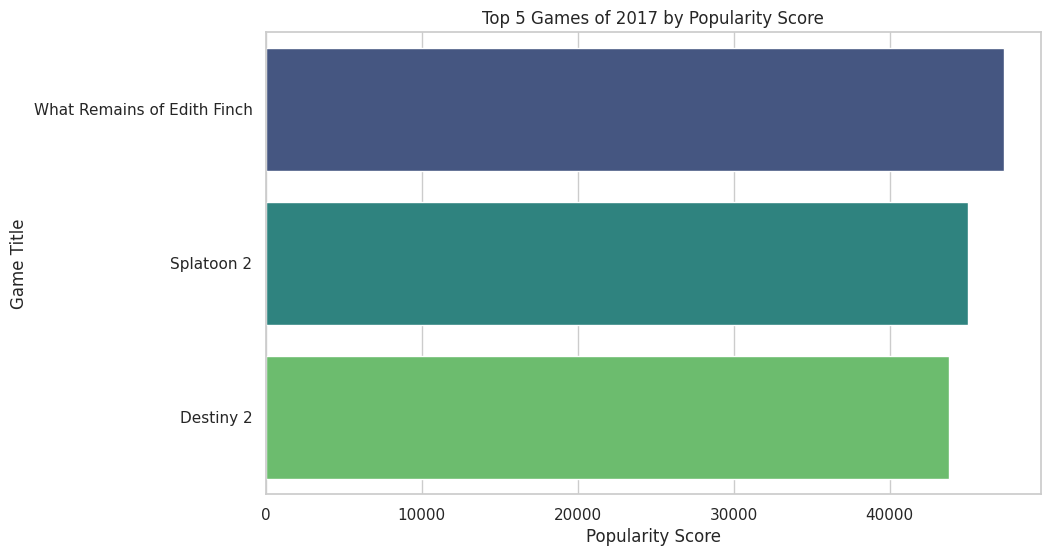

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

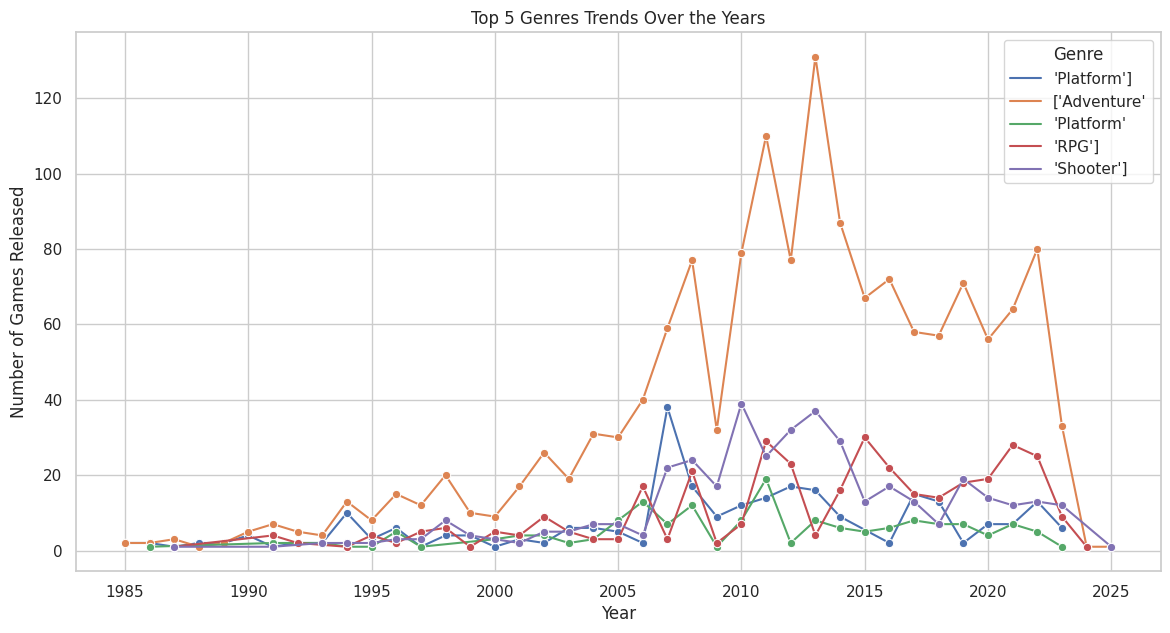

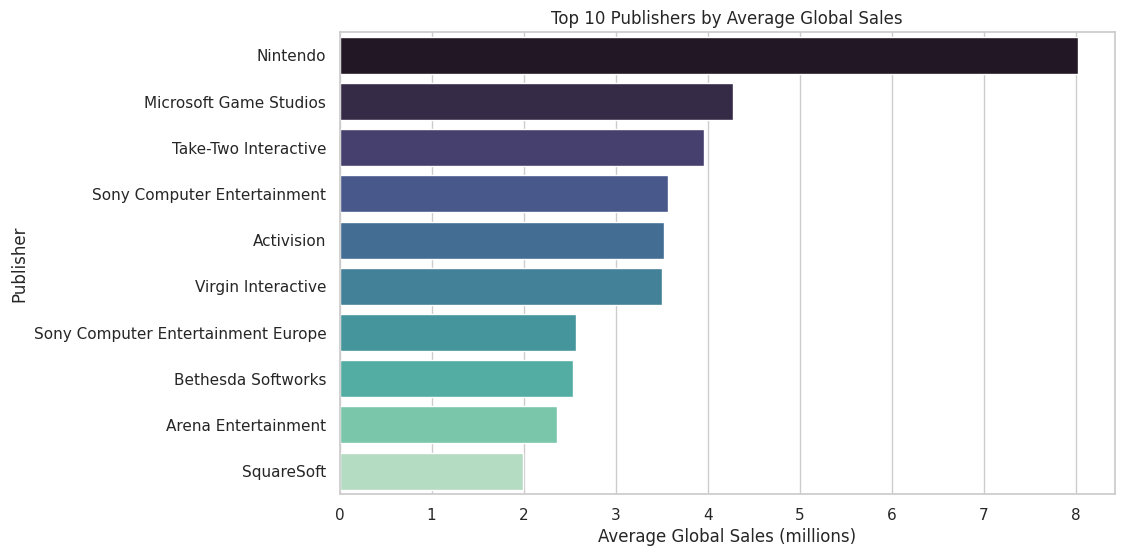

<Figure size 800x600 with 0 Axes>

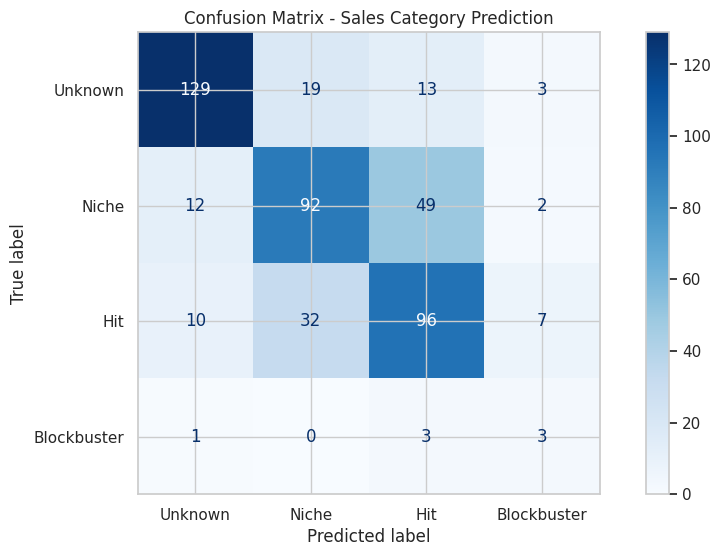

In [10]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Set style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# ----------------------------------------
# 1. Bar Plot: Top 5 Games by Popularity Score (Sample Year)
sample_year = 2017

top_games_sample_year = merged_df[merged_df['Release_Year'] == sample_year].sort_values(by='Popularity_Score', ascending=False).head(5)

plt.figure(figsize=(10,6))
sns.barplot(x='Popularity_Score', y='Game', data=top_games_sample_year, palette="viridis")
plt.title(f"Top 5 Games of {sample_year} by Popularity Score")
plt.xlabel('Popularity Score')
plt.ylabel('Game Title')
plt.show()

# ----------------------------------------
# 2. Line Plot: Genre Trends Over Time (Top 5 Genres)
top_genres = genre_counts_by_year['Genres_Split'].value_counts().head(5).index.tolist()

genre_trends = genre_counts_by_year[genre_counts_by_year['Genres_Split'].isin(top_genres)]

plt.figure(figsize=(14,7))
sns.lineplot(x='Release_Year', y='Count', hue='Genres_Split', data=genre_trends, marker='o')
plt.title('Top 5 Genres Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.legend(title='Genre')
plt.show()

# ----------------------------------------
# 3. Bar Plot: Top 10 Publishers by Average Global Sales
plt.figure(figsize=(10,6))
sns.barplot(x='Global_Sales', y='Publisher', data=publisher_sales, palette="mako")
plt.title('Top 10 Publishers by Average Global Sales')
plt.xlabel('Average Global Sales (millions)')
plt.ylabel('Publisher')
plt.show()

# ----------------------------------------
# 4. Confusion Matrix for Machine Learning Model
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Unknown', 'Niche', 'Hit', 'Blockbuster'])

plt.figure(figsize=(8,6))
cmd.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Sales Category Prediction')
plt.show()


In [12]:
# 1. Function to get Top Games of a Specific Year
def get_top_games_by_year(year, top_n=5):
    year_games = merged_df[merged_df['Release_Year'] == year]
    top_games = year_games.sort_values(by='Popularity_Score', ascending=False).head(top_n)
    return top_games[['Game', 'Popularity_Score', 'Rating', 'Global_Sales', 'Sales_Category']]

# Example usage:
# get_top_games_by_year(2017)

# ----------------------------------------

# 2. Function to get Genre Trend Over Time
def get_genre_trend(genre_name):
    genre_filtered = genre_counts_by_year[genre_counts_by_year['Genres_Split'] == genre_name]
    return genre_filtered[['Release_Year', 'Count']]

# Example usage:
# get_genre_trend('Action')

# ----------------------------------------

# 3. Function to Predict Game Sales Category
def predict_sales_category(rating, popularity_score):
    input_features = [[rating, popularity_score]]
    prediction = rf_model.predict(input_features)[0]
    
    # Decode prediction
    category_map = {0: 'Unknown', 1: 'Niche', 2: 'Hit', 3: 'Blockbuster'}
    return category_map[prediction]

# Example usage:
# predict_sales_category(4.2, 20000)

# ----------------------------------------

# 4. Function to get Top Publishers
def get_top_publishers(top_n=10):
    return publisher_sales.head(top_n)

# Example usage:
# get_top_publishers()
